**PROJEK** **PBA** **-** **KELOMPOK** **ABC** 

**Nama Kelompok ABC:**
1. 11S18027 - Romauli Siagian (Ketua)
2. 11S18003 - Febby Irene Siringoringo
3. 11S18011 - Awit Hutabalian
4. 11S18032 - Rido Sitanggang
5. 11S18057 - Marlyse Sitorus
6. 11S18059 - Kristiane Purba

**Tanggal Pengerjaan** : Jumat, 19 November 2021

Langkah Pertama yang kita lakukan adalah melakukan instalasi dataset.

In [1]:
#!pip install datasets

Kemudian import dataset nya dari load_dataset

In [2]:
from datasets import load_dataset
import re
import pandas as pd

In [3]:
#dataset = load_dataset("go_emotions", "raw")

In [4]:
#dataset = dataset.data["train"].to_pandas()

In [5]:
#dataset.to_csv("dataset.csv", sep=";")

In [6]:
train = pd.read_csv('dataset.csv',sep=';')
train.head()

,Unnamed: 0,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,...,0,0,0,0,0,0,0,1,0,0
1,1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,False,...,0,0,0,0,0,0,0,0,0,0
2,2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,...,0,0,0,0,0,0,0,0,0,1
3,3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,...,1,0,0,0,0,0,0,0,0,0
4,4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546668e+09,2,False,...,0,0,0,0,0,0,0,0,0,1


In [7]:
unuse = ['id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear']
feats_df = train.drop(columns = unuse)

In [8]:
feats_df.head()

,Unnamed: 0,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0,That game hurt.,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,Man I love reddit.,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
# save transformed data into csv file
new_datasets = feats_df.to_csv('./transformed_data/transformed_data.csv',sep=';')

In [10]:
# read transformed_data
transformed_data = pd.read_csv('./transformed_data/transformed_data.csv',sep=';')
unuse = ['Unnamed: 0', 'Unnamed: 0.1']
transformed_data = transformed_data.drop(columns = unuse)
transformed_data.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
# text cleaning
def cleaning(data):
    data = re.sub("\\\\r", " ", data)
    data = re.sub("[^a-zA-Z]"," ",data) 
    data = re.sub("\\\\n", " ", data)
    data = re.sub("\n", " ", data)
    data = re.sub("\r", " ", data)
    data = re.sub("&amp", " ", data)
    data = re.sub("&gt", " ", data)
    data = re.sub("&lt", " ", data)
    data = re.sub("    ", " ", data)
    data = re.sub(r'''(?i)\b((?:https|http?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", data)
    data = re.sub('"', '', data)
    data = re.sub("\\\\x[a-zA-z0-9][a-zA-z0-9]","", data)
    return data

In [12]:
transformed_data['texts'] = transformed_data['text'].apply(lambda x: cleaning(x))

In [13]:
transformed_data['text'] = transformed_data['texts']

In [14]:
transformed_data.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,texts
0,That game hurt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,That game hurt
1,sexuality shouldn t be a grouping category I...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sexuality shouldn t be a grouping category I...
2,You do right if you don t care then fuck em,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,You do right if you don t care then fuck em
3,Man I love reddit,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Man I love reddit
4,NAME was nowhere near them he was by the Fa...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NAME was nowhere near them he was by the Fa...


In [15]:
# save datasets after cleaning into csv file
transformed_data.to_csv('./transformed_data/cleanead_data.csv',sep=';')

In [16]:
# read data after cleaning 
cleanead_data = pd.read_csv('./transformed_data/cleanead_data.csv',sep=';')

In [17]:
cleanead_data.head(20)

,Unnamed: 0,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,texts
0,0,That game hurt,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,That game hurt
1,1,sexuality shouldn t be a grouping category I...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sexuality shouldn t be a grouping category I...
2,2,You do right if you don t care then fuck em,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,You do right if you don t care then fuck em
3,3,Man I love reddit,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Man I love reddit
4,4,NAME was nowhere near them he was by the Fa...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NAME was nowhere near them he was by the Fa...
5,5,Right Considering it s such an important docu...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Right Considering it s such an important docu...
6,6,He isn t as big but he s still quite popular ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,He isn t as big but he s still quite popular ...
7,7,That s crazy I went to a super RELIGION hig...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,That s crazy I went to a super RELIGION hig...
8,8,that s adorable asf,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,that s adorable asf
9,9,Sponge Blurb Pubs Quaw Haha GURR ha AAa fin...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sponge Blurb Pubs Quaw Haha GURR ha AAa fin...


Case Folding

In [18]:
def clean_text(text):text = text.lower() 

In [19]:
feats_df.head()

,Unnamed: 0,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0,That game hurt.,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,Man I love reddit.,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Tokenisasi

In [20]:
from nltk.tokenize import SpaceTokenizer
from nltk.tokenize import word_tokenize

words = []

for i in range(0, feats_df['text'].size):
  sTokenizer = SpaceTokenizer()

In [21]:
feats_df.head()

,Unnamed: 0,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0,That game hurt.,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,Man I love reddit.,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:

from nltk.tokenize import SpaceTokenizer, RegexpTokenizer, TweetTokenizer
from nltk.tokenize import word_tokenize

TF - IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split

X = feats_df["text"]
y = np.asarray(feats_df[feats_df.columns[1:]])

vetorizar = TfidfVectorizer(max_features=3000, max_df=0.85)

vetorizar.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train_tfidf = vetorizar.transform(X_train)
X_test_tfidf = vetorizar.transform(X_test)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer() 
response = tfidf.fit_transform(X_train.apply(lambda x: np.str_(x))) 
feature_names = tfidf.get_feature_names() 
for col in response.nonzero()[1]: 
 print (feature_names[col], ' - ', response[0, col]) 
response = tfidf.fit_transform(X_test.values.astype('U')) 
feature_names = tfidf.get_feature_names() 
for col in response.nonzero()[1]: 
 print (feature_names[col], ' - ', response[0, col])

ago  -  0.24875985785890678
years  -  0.21687305134235102
30  -  0.28679877667492965
him  -  0.18185174651053596
am  -  0.21054140118870585
because  -  0.18440199870628732
this  -  0.11751598632863675
why  -  0.18863877037838572
know  -  0.3506740601717664
life  -  0.21701388719929288
his  -  0.18280261158489783
of  -  0.1148172099285807
rest  -  0.27515502876586717
the  -  0.08396836544340548
you  -  0.20310193280826336
losing  -  0.2961613565563725
regret  -  0.30797261143818766
gonna  -  0.23816144988692634
is  -  0.10832832817230861
guy  -  0.21385142815836813
that  -  0.10300072293483582
protista  -  0.0
above  -  0.0
them  -  0.0
rank  -  0.0
did  -  0.0
others  -  0.0
to  -  0.0
harmful  -  0.0
becomes  -  0.0
it  -  0.0
when  -  0.0
radar  -  0.0
governments  -  0.0
on  -  0.0
be  -  0.0
should  -  0.0
behavior  -  0.0
personal  -  0.0
re  -  0.0
time  -  0.0
only  -  0.0
the  -  0.08396836544340548
you  -  0.20310193280826336
is  -  0.10832832817230861
stuff  -  0.0
our  -  0.

personal  -  0.0
the  -  0.08396836544340548
is  -  0.10832832817230861
that  -  0.10300072293483582
painlessly  -  0.0
go  -  0.0
die  -  0.0
were  -  0.0
horrifying  -  0.0
her  -  0.0
want  -  0.0
if  -  0.0
she  -  0.0
just  -  0.0
to  -  0.0
is  -  0.10832832817230861
haha  -  0.0
whoops  -  0.0
oh  -  0.0
something  -  0.0
mom  -  0.0
tell  -  0.0
16  -  0.0
forum  -  0.0
kids  -  0.0
these  -  0.0
therapist  -  0.0
young  -  0.0
like  -  0.0
not  -  0.0
way  -  0.0
too  -  0.0
feel  -  0.0
for  -  0.0
or  -  0.0
need  -  0.0
your  -  0.0
pay  -  0.0
to  -  0.0
on  -  0.0
be  -  0.0
this  -  0.11751598632863675
is  -  0.10832832817230861
that  -  0.10300072293483582
ace  -  0.0
captain  -  0.0
nt  -  0.0
he  -  0.0
duh  -  0.0
love  -  0.0
our  -  0.0
and  -  0.0
we  -  0.0
him  -  0.18185174651053596
violent  -  0.0
playing  -  0.0
aren  -  0.0
school  -  0.0
clear  -  0.0
hell  -  0.0
in  -  0.0
was  -  0.0
too  -  0.0
game  -  0.0
made  -  0.0
high  -  0.0
we  -  0.0
it  -  0.

wait  -  0.0
tried  -  0.0
in  -  0.0
your  -  0.0
with  -  0.0
and  -  0.0
did  -  0.0
kicks  -  0.0
autopilot  -  0.0
look  -  0.0
confused  -  0.0
someplace  -  0.0
librarians  -  0.0
out  -  0.0
see  -  0.0
in  -  0.0
same  -  0.0
someone  -  0.0
with  -  0.0
and  -  0.0
it  -  0.0
the  -  0.08396836544340548
that  -  0.10300072293483582
smoking  -  0.0
what  -  0.0
are  -  0.0
you  -  0.20310193280826336
figuring  -  0.0
out  -  0.0
hard  -  0.0
part  -  0.0
really  -  0.0
seems  -  0.0
it  -  0.0
the  -  0.08396836544340548
40  -  0.0
rate  -  0.0
pk  -  0.0
play  -  0.0
reason  -  0.0
probably  -  0.0
agree  -  0.0
her  -  0.0
win  -  0.0
my  -  0.0
too  -  0.0
really  -  0.0
for  -  0.0
with  -  0.0
only  -  0.0
the  -  0.08396836544340548
is  -  0.10832832817230861
that  -  0.10300072293483582
bro  -  0.0
hugs  -  0.0
there  -  0.0
go  -  0.0
you  -  0.20310193280826336
okay  -  0.0
gurl  -  0.0
tho  -  0.0
decaf  -  0.0
like  -  0.0
good  -  0.0
really  -  0.0
ll  -  0.0
our 

this  -  0.11751598632863675
that  -  0.10300072293483582
liked  -  0.0
name  -  0.0
embarrassing  -  0.0
fucking  -  0.0
team  -  0.0
this  -  0.11751598632863675
is  -  0.10832832817230861
discuss  -  0.0
starting  -  0.0
questions  -  0.0
answer  -  0.0
were  -  0.0
happy  -  0.0
great  -  0.0
but  -  0.0
have  -  0.0
don  -  0.0
to  -  0.0
it  -  0.0
the  -  0.08396836544340548
that  -  0.10300072293483582
style  -  0.0
drinks  -  0.0
old  -  0.0
no  -  0.0
one  -  0.0
straight  -  0.0
without  -  0.0
bisexual  -  0.0
woman  -  0.0
figuring  -  0.0
date  -  0.0
out  -  0.0
another  -  0.0
people  -  0.0
can  -  0.0
how  -  0.0
if  -  0.0
you  -  0.20310193280826336
weight  -  0.0
lied  -  0.0
themselves  -  0.0
40  -  0.0
seriously  -  0.0
ve  -  0.0
people  -  0.0
age  -  0.0
about  -  0.0
take  -  0.0
never  -  0.0
so  -  0.0
my  -  0.0
or  -  0.0
and  -  0.0
juice  -  0.0
hurty  -  0.0
myself  -  0.0
tho  -  0.0
brain  -  0.0
off  -  0.0
much  -  0.0
cool  -  0.0
very  -  0.0
my

to  -  0.0
you  -  0.20310193280826336
chapters  -  0.0
previous  -  0.0
spoiled  -  0.0
author  -  0.0
already  -  0.0
he  -  0.0
in  -  0.0
will  -  0.0
it  -  0.0
the  -  0.08396836544340548
crying  -  0.0
verge  -  0.0
constantly  -  0.0
nervousness  -  0.0
ball  -  0.0
sister  -  0.0
reminds  -  0.0
crazy  -  0.0
my  -  0.0
me  -  0.0
she  -  0.0
just  -  0.0
and  -  0.0
on  -  0.0
of  -  0.1148172099285807
the  -  0.08396836544340548
got  -  0.0
you  -  0.20310193280826336
consider  -  0.0
racism  -  0.0
implies  -  0.0
metaphor  -  0.0
inflammatory  -  0.0
alternative  -  0.0
suggest  -  0.0
non  -  0.0
something  -  0.0
happy  -  0.0
an  -  0.0
like  -  0.0
for  -  0.0
if  -  0.0
to  -  0.0
it  -  0.0
you  -  0.20310193280826336
that  -  0.10300072293483582
treason  -  0.0
garbage  -  0.0
prequels  -  0.0
then  -  0.0
it  -  0.0
the  -  0.08396836544340548
mass  -  0.0
cultivate  -  0.0
some  -  0.0
to  -  0.0
it  -  0.0
time  -  0.0
isoing  -  0.0
bayless  -  0.0
fuck  -  0.0


his  -  0.18280261158489783
worded  -  0.0
molester  -  0.0
confused  -  0.0
family  -  0.0
who  -  0.0
in  -  0.0
was  -  0.0
cause  -  0.0
way  -  0.0
me  -  0.0
it  -  0.0
the  -  0.08396836544340548
you  -  0.20310193280826336
tomorrow  -  0.0
excited  -  0.0
situations  -  0.0
by  -  0.0
he  -  0.0
see  -  0.0
like  -  0.0
love  -  0.0
if  -  0.0
ll  -  0.0
make  -  0.0
to  -  0.0
it  -  0.0
this  -  0.11751598632863675
conclusion  -  0.0
led  -  0.0
wrote  -  0.0
attacker  -  0.0
called  -  0.0
since  -  0.0
saying  -  0.0
defending  -  0.0
then  -  0.0
out  -  0.0
point  -  0.0
sentence  -  0.0
for  -  0.0
me  -  0.0
which  -  0.0
just  -  0.0
to  -  0.0
am  -  0.21054140118870585
the  -  0.08396836544340548
you  -  0.20310193280826336
that  -  0.10300072293483582
under  -  0.0
lions  -  0.0
remember  -  0.0
no  -  0.0
just  -  0.0
name  -  0.0
the  -  0.08396836544340548
mentioned  -  0.0
fotos  -  0.0
film  -  0.0
files  -  0.0
curious  -  0.0
kinda  -  0.0
those  -  0.0
about

lured  -  0.0
video  -  0.0
by  -  0.0
got  -  0.0
like  -  0.0
feel  -  0.0
into  -  0.0
vj  -  0.0
schedule  -  0.0
didnt  -  0.0
dallas  -  0.0
beaten  -  0.0
play  -  0.0
could  -  0.0
team  -  0.0
lol  -  0.0
have  -  0.0
with  -  0.0
even  -  0.0
our  -  0.0
we  -  0.0
that  -  0.10300072293483582
funny  -  0.0
thought  -  0.0
was  -  0.0
it  -  0.0
blessed  -  0.0
much  -  0.0
so  -  0.0
thank  -  0.0
name  -  0.0
this  -  0.11751598632863675
you  -  0.20310193280826336
is  -  0.10832832817230861
ripped  -  0.0
tremendously  -  0.0
hurt  -  0.0
easily  -  0.0
bloody  -  0.0
painful  -  0.0
piercings  -  0.0
lip  -  0.0
pulled  -  0.0
out  -  0.0
nipple  -  0.0
would  -  0.0
if  -  0.0
are  -  0.0
also  -  0.0
and  -  0.0
be  -  0.0
mummied  -  0.0
best  -  0.0
far  -  0.0
like  -  0.0
so  -  0.0
name  -  0.0
the  -  0.08396836544340548
labyrinth  -  0.0
pans  -  0.0
movies  -  0.0
favorite  -  0.0
my  -  0.0
one  -  0.0
of  -  0.1148172099285807
that  -  0.10300072293483582
tobi

am  -  0.21054140118870585
sneak  -  0.0
train  -  0.0
sorry  -  0.0
wrong  -  0.0
comment  -  0.0
by  -  0.0
there  -  0.0
ya  -  0.0
right  -  0.0
just  -  0.0
gonna  -  0.23816144988692634
board  -  0.0
backwards  -  0.0
went  -  0.0
she  -  0.0
on  -  0.0
the  -  0.08396836544340548
camped  -  0.0
wraith  -  0.0
swear  -  0.0
every  -  0.0
went  -  0.0
against  -  0.0
pi  -  0.0
star  -  0.0
piola  -  0.0
luigi  -  0.0
flavors  -  0.0
downtown  -  0.0
bombay  -  0.0
frank  -  0.0
bunch  -  0.0
pizza  -  0.0
different  -  0.0
pretty  -  0.0
good  -  0.0
also  -  0.0
of  -  0.1148172099285807
is  -  0.10832832817230861
hold  -  0.0
breath  -  0.0
your  -  0.0
don  -  0.0
deleted  -  0.0
thread  -  0.0
comment  -  0.0
looking  -  0.0
was  -  0.0
at  -  0.0
now  -  0.0
seems  -  0.0
also  -  0.0
it  -  0.0
this  -  0.11751598632863675
the  -  0.08396836544340548
that  -  0.10300072293483582
chiefs  -  0.0
pats  -  0.0
hate  -  0.0
fans  -  0.0
more  -  0.0
the  -  0.08396836544340548
p

can  -  0.0
now  -  0.0
it  -  0.0
you  -  0.20310193280826336
that  -  0.10300072293483582
development  -  0.0
arrested  -  0.0
last  -  0.0
on  -  0.0
time  -  0.0
general  -  0.0
anxiety  -  0.0
stress  -  0.0
gotcha  -  0.0
wife  -  0.0
from  -  0.0
okay  -  0.0
her  -  0.0
in  -  0.0
job  -  0.0
does  -  0.0
or  -  0.0
your  -  0.0
have  -  0.0
lot  -  0.0
just  -  0.0
and  -  0.0
of  -  0.1148172099285807
danganrompa  -  0.0
concept  -  0.0
there  -  0.0
great  -  0.0
going  -  0.0
but  -  0.0
to  -  0.0
be  -  0.0
is  -  0.10832832817230861
failure  -  0.0
policy  -  0.0
billionaire  -  0.0
damn  -  0.0
every  -  0.0
right  -  0.0
is  -  0.10832832817230861
incels  -  0.0
chart  -  0.0
whole  -  0.0
something  -  0.0
looks  -  0.0
like  -  0.0
made  -  0.0
post  -  0.0
up  -  0.0
someone  -  0.0
to  -  0.0
on  -  0.0
that  -  0.10300072293483582
humiliating  -  0.0
unreasonable  -  0.0
replied  -  0.0
ccp  -  0.0
reviews  -  0.0
quarterly  -  0.0
allowed  -  0.0
asking  -  0.0
u

our  -  0.0
chickenpox  -  0.0
rooms  -  0.0
isolated  -  0.0
baby  -  0.0
else  -  0.0
us  -  0.0
where  -  0.0
room  -  0.0
go  -  0.0
in  -  0.0
was  -  0.0
they  -  0.0
my  -  0.0
no  -  0.0
one  -  0.0
put  -  0.0
with  -  0.0
and  -  0.0
had  -  0.0
to  -  0.0
when  -  0.0
aged  -  0.0
horribly  -  0.0
ve  -  0.0
you  -  0.20310193280826336
mdma  -  0.0
drugs  -  0.0
careful  -  0.0
often  -  0.0
taking  -  0.0
people  -  0.0
like  -  0.0
it  -  0.0
be  -  0.0
of  -  0.1148172099285807
regret  -  0.30797261143818766
cared  -  0.0
bangin  -  0.0
ride  -  0.0
characters  -  0.0
about  -  0.0
fun  -  0.0
was  -  0.0
movie  -  0.0
super  -  0.0
ya  -  0.0
with  -  0.0
it  -  0.0
track  -  0.0
less  -  0.0
keep  -  0.0
to  -  0.0
of  -  0.1148172099285807
say  -  0.0
he  -  0.0
what  -  0.0
did  -  0.0
position  -  0.0
passrusher  -  0.0
overall  -  0.0
graded  -  0.0
highest  -  0.0
class  -  0.0
in  -  0.0
not  -  0.0
at  -  0.0
any  -  0.0
name  -  0.0
oh  -  0.0
did  -  0.0
this  

wicked  -  0.0
monkeys  -  0.0
flying  -  0.0
suppose  -  0.0
more  -  0.0
like  -  0.0
so  -  0.0
they  -  0.0
than  -  0.0
re  -  0.0
the  -  0.08396836544340548
anyway  -  0.0
yourself  -  0.0
luck  -  0.0
great  -  0.0
wish  -  0.0
lmao  -  0.0
so  -  0.0
think  -  0.0
down  -  0.0
ll  -  0.0
do  -  0.0
don  -  0.0
believe  -  0.0
and  -  0.0
of  -  0.1148172099285807
you  -  0.20310193280826336
thinks  -  0.0
killing  -  0.0
got  -  0.0
her  -  0.0
future  -  0.0
like  -  0.0
really  -  0.0
me  -  0.0
she  -  0.0
name  -  0.0
it  -  0.0
is  -  0.10832832817230861
ginormous  -  0.0
true  -  0.0
love  -  0.0
so  -  0.0
use  -  0.0
of  -  0.1148172099285807
the  -  0.08396836544340548
driven  -  0.0
story  -  0.0
character  -  0.0
watched  -  0.0
think  -  0.0
same  -  0.0
good  -  0.0
movie  -  0.0
as  -  0.0
don  -  0.0
we  -  0.0
did  -  0.0
this  -  0.11751598632863675
the  -  0.08396836544340548
guy  -  0.21385142815836813
hoooome  -  0.0
workers  -  0.0
going  -  0.0
are  -  0.

middle  -  0.0
places  -  0.0
bad  -  0.0
contract  -  0.0
in  -  0.0
all  -  0.0
for  -  0.0
with  -  0.0
to  -  0.0
it  -  0.0
on  -  0.0
be  -  0.0
why  -  0.18863877037838572
of  -  0.1148172099285807
the  -  0.08396836544340548
gladiators  -  0.0
go  -  0.0
let  -  0.0
would  -  0.0
come  -  0.0
how  -  0.0
name  -  0.0
on  -  0.0
forever  -  0.0
ve  -  0.0
been  -  0.0
looking  -  0.0
thank  -  0.0
for  -  0.0
this  -  0.11751598632863675
you  -  0.20310193280826336
olds  -  0.0
20  -  0.0
choice  -  0.0
band  -  0.0
velvet  -  0.0
underground  -  0.0
year  -  0.0
like  -  0.0
feel  -  0.0
for  -  0.0
yeah  -  0.0
of  -  0.1148172099285807
the  -  0.08396836544340548
is  -  0.10832832817230861
weird  -  0.0
game  -  0.0
lol  -  0.0
anything  -  0.0
worse  -  0.0
close  -  0.0
still  -  0.0
least  -  0.0
not  -  0.0
at  -  0.0
are  -  0.0
person  -  0.0
and  -  0.0
to  -  0.0
it  -  0.0
you  -  0.20310193280826336
that  -  0.10300072293483582
celebrate  -  0.0
writing  -  0.0
see 

with  -  0.0
name  -  0.0
mean  -  0.0
re  -  0.0
you  -  0.20310193280826336
deal  -  0.0
deserve  -  0.0
mean  -  0.0
he  -  0.0
doesn  -  0.0
too  -  0.0
with  -  0.0
name  -  0.0
had  -  0.0
to  -  0.0
this  -  0.11751598632863675
gives  -  0.0
me  -  0.0
this  -  0.11751598632863675
life  -  0.21701388719929288
55  -  0.0
title  -  0.0
party  -  0.0
maybe  -  0.0
may  -  0.0
haha  -  0.0
in  -  0.0
at  -  0.0
the  -  0.08396836544340548
else  -  0.0
glad  -  0.0
went  -  0.0
there  -  0.0
thought  -  0.0
first  -  0.0
so  -  0.0
was  -  0.0
my  -  0.0
too  -  0.0
honestly  -  0.0
someone  -  0.0
that  -  0.10300072293483582
critical  -  0.0
equally  -  0.0
saying  -  0.0
they  -  0.0
no  -  0.0
are  -  0.0
like  -  0.0
your  -  0.0
name  -  0.0
hot  -  0.0
damn  -  0.0
comprehend  -  0.0
say  -  0.0
always  -  0.0
thank  -  0.0
can  -  0.0
name  -  0.0
we  -  0.0
it  -  0.0
wastefully  -  0.0
instead  -  0.0
used  -  0.0
money  -  0.0
taking  -  0.0
government  -  0.0
by  -  0.0
s

with  -  0.0
isn  -  0.0
the  -  0.08396836544340548
guy  -  0.21385142815836813
robbed  -  0.0
unpopular  -  0.0
wins  -  0.0
air  -  0.0
tea  -  0.0
once  -  0.0
actually  -  0.0
mean  -  0.0
top  -  0.0
no  -  0.0
one  -  0.0
at  -  0.0
for  -  0.0
if  -  0.0
sure  -  0.0
even  -  0.0
it  -  0.0
time  -  0.0
of  -  0.1148172099285807
the  -  0.08396836544340548
is  -  0.10832832817230861
emotionless  -  0.0
falsely  -  0.0
men  -  0.0
society  -  0.0
normal  -  0.0
cold  -  0.0
once  -  0.0
look  -  0.0
again  -  0.0
has  -  0.0
made  -  0.0
and  -  0.0
re  -  0.0
you  -  0.20310193280826336
poker  -  0.0
play  -  0.0
ever  -  0.0
lol  -  0.0
don  -  0.0
faint  -  0.0
positive  -  0.0
different  -  0.0
not  -  0.0
or  -  0.0
any  -  0.0
lol  -  0.0
and  -  0.0
is  -  0.10832832817230861
that  -  0.10300072293483582
host  -  0.0
haha  -  0.0
add  -  0.0
can  -  0.0
list  -  0.0
to  -  0.0
the  -  0.08396836544340548
theme  -  0.0
mets  -  0.0
excited  -  0.0
fans  -  0.0
hear  -  0.0

aspect  -  0.0
hunting  -  0.0
bow  -  0.0
added  -  0.0
happily  -  0.0
mate  -  0.0
got  -  0.0
ve  -  0.0
what  -  0.0
well  -  0.0
love  -  0.0
so  -  0.0
not  -  0.0
game  -  0.0
just  -  0.0
and  -  0.0
of  -  0.1148172099285807
the  -  0.08396836544340548
you  -  0.20310193280826336
haha  -  0.0
guess  -  0.0
thanks  -  0.0
defensively  -  0.0
monster  -  0.0
weren  -  0.0
quarter  -  0.0
transit  -  0.0
rewatching  -  0.0
4th  -  0.0
kidding  -  0.0
since  -  0.0
during  -  0.0
in  -  0.0
was  -  0.0
game  -  0.0
name  -  0.0
the  -  0.08396836544340548
you  -  0.20310193280826336
leap  -  0.0
huge  -  0.0
bad  -  0.0
was  -  0.0
my  -  0.0
right  -  0.0
oh  -  0.0
that  -  0.10300072293483582
fundraisers  -  0.0
alabama  -  0.0
bucks  -  0.0
gotta  -  0.0
excited  -  0.0
dad  -  0.0
paid  -  0.0
school  -  0.0
he  -  0.0
big  -  0.0
love  -  0.0
how  -  0.0
with  -  0.0
know  -  0.3506740601717664
you  -  0.20310193280826336
is  -  0.10832832817230861
that  -  0.10300072293483

other  -  0.0
being  -  0.0
or  -  0.0
some  -  0.0
name  -  0.0
and  -  0.0
we  -  0.0
to  -  0.0
re  -  0.0
mercy  -  0.0
eternal  -  0.0
imaginary  -  0.0
loves  -  0.0
true  -  0.0
won  -  0.0
god  -  0.0
who  -  0.0
great  -  0.0
living  -  0.0
an  -  0.0
one  -  0.0
feel  -  0.0
better  -  0.0
right  -  0.0
make  -  0.0
just  -  0.0
and  -  0.0
of  -  0.1148172099285807
the  -  0.08396836544340548
you  -  0.20310193280826336
that  -  0.10300072293483582
genitals  -  0.0
toddler  -  0.0
surprised  -  0.0
look  -  0.0
by  -  0.0
own  -  0.0
like  -  0.0
being  -  0.0
yeah  -  0.0
his  -  0.18280261158489783
hidden  -  0.0
unlockable  -  0.0
3d  -  0.0
etc  -  0.0
characters  -  0.0
maybe  -  0.0
could  -  0.0
tbh  -  0.0
fit  -  0.0
might  -  0.0
though  -  0.0
in  -  0.0
think  -  0.0
they  -  0.0
thanks  -  0.0
some  -  0.0
name  -  0.0
be  -  0.0
crying  -  0.0
not  -  0.0
are  -  0.0
you  -  0.20310193280826336
commentating  -  0.0
much  -  0.0
like  -  0.0
cool  -  0.0
would  

you  -  0.20310193280826336
police  -  0.0
stay  -  0.0
call  -  0.0
maybe  -  0.0
friend  -  0.0
tell  -  0.0
over  -  0.0
can  -  0.0
place  -  0.0
at  -  0.0
your  -  0.0
and  -  0.0
should  -  0.0
his  -  0.18280261158489783
the  -  0.08396836544340548
you  -  0.20310193280826336
bingo  -  0.0
lifestyle  -  0.0
cf  -  0.0
upon  -  0.0
extended  -  0.0
sadly  -  0.0
belt  -  0.0
bible  -  0.0
ky  -  0.0
norm  -  0.0
nothing  -  0.0
family  -  0.0
states  -  0.0
looks  -  0.0
in  -  0.0
but  -  0.0
not  -  0.0
other  -  0.0
my  -  0.0
or  -  0.0
definitely  -  0.0
with  -  0.0
the  -  0.08396836544340548
waste  -  0.0
horrible  -  0.0
time  -  0.0
of  -  0.1148172099285807
hate  -  0.0
omg  -  0.0
do  -  0.0
just  -  0.0
name  -  0.0
wearing  -  0.0
enjoy  -  0.0
would  -  0.0
she  -  0.0
and  -  0.0
impressive  -  0.0
opinion  -  0.0
cut  -  0.0
been  -  0.0
has  -  0.0
clear  -  0.0
top  -  0.0
like  -  0.0
in  -  0.0
not  -  0.0
my  -  0.0
seems  -  0.0
name  -  0.0
the  -  0.0839

outdated  -  0.0
anime  -  0.0
from  -  0.0
new  -  0.0
probably  -  0.0
23  -  0.0
16  -  0.0
idk  -  0.0
about  -  0.0
but  -  0.0
too  -  0.0
for  -  0.0
any  -  0.0
it  -  0.0
ago  -  0.24875985785890678
years  -  0.21687305134235102
his  -  0.18280261158489783
pft  -  0.0
yourself  -  0.0
kid  -  0.0
don  -  0.0
realize  -  0.0
em  -  0.0
took  -  0.0
all  -  0.0
to  -  0.0
time  -  0.0
only  -  0.0
of  -  0.1148172099285807
the  -  0.08396836544340548
brained  -  0.0
donkey  -  0.0
showing  -  0.0
certificate  -  0.0
man  -  0.0
not  -  0.0
have  -  0.0
do  -  0.0
re  -  0.0
you  -  0.20310193280826336
medium  -  0.0
cries  -  0.0
for  -  0.0
name  -  0.0
to  -  0.0
when  -  0.0
sexual  -  0.0
political  -  0.0
used  -  0.0
insult  -  0.0
nothing  -  0.0
about  -  0.0
they  -  0.0
as  -  0.0
it  -  0.0
life  -  0.21701388719929288
his  -  0.18280261158489783
safe  -  0.0
okay  -  0.0
sex  -  0.0
matter  -  0.0
what  -  0.0
kind  -  0.0
no  -  0.0
ll  -  0.0
have  -  0.0
and  -  0

idea  -  0.0
same  -  0.0
way  -  0.0
no  -  0.0
super  -  0.0
find  -  0.0
had  -  0.0
others  -  0.0
this  -  0.11751598632863675
the  -  0.08396836544340548
depending  -  0.0
families  -  0.0
coast  -  0.0
guard  -  0.0
money  -  0.0
paid  -  0.0
getting  -  0.0
not  -  0.0
they  -  0.0
right  -  0.0
sure  -  0.0
have  -  0.0
now  -  0.0
on  -  0.0
am  -  0.21054140118870585
is  -  0.10832832817230861
that  -  0.10300072293483582
proves  -  0.0
demean  -  0.0
incel  -  0.0
society  -  0.0
constantly  -  0.0
worse  -  0.0
getting  -  0.0
words  -  0.0
fact  -  0.0
already  -  0.0
people  -  0.0
like  -  0.0
use  -  0.0
than  -  0.0
just  -  0.0
to  -  0.0
it  -  0.0
the  -  0.08396836544340548
is  -  0.10832832817230861
that  -  0.10300072293483582
false  -  0.0
spreading  -  0.0
hope  -  0.0
stop  -  0.0
dictatorship  -  0.0
cannot  -  0.0
confirm  -  0.0
yet  -  0.0
see  -  0.0
any  -  0.0
don  -  0.0
suppliers  -  0.0
cream  -  0.0
dozens  -  0.0
ingredients  -  0.0
else  -  0.0
i

old  -  0.0
who  -  0.0
year  -  0.0
was  -  0.0
my  -  0.0
one  -  0.0
me  -  0.0
made  -  0.0
up  -  0.0
and  -  0.0
laugh  -  0.0
for  -  0.0
thanks  -  0.0
the  -  0.08396836544340548
senses  -  0.0
cover  -  0.0
under  -  0.0
both  -  0.0
go  -  0.0
in  -  0.0
not  -  0.0
why  -  0.18863877037838572
bench  -  0.0
coach  -  0.0
boston  -  0.0
behind  -  0.0
want  -  0.0
see  -  0.0
what  -  0.0
way  -  0.0
no  -  0.0
do  -  0.0
our  -  0.0
to  -  0.0
brainwashing  -  0.0
warriors  -  0.0
center  -  0.0
front  -  0.0
questioning  -  0.0
gotta  -  0.0
consider  -  0.0
things  -  0.0
these  -  0.0
in  -  0.0
love  -  0.0
how  -  0.0
for  -  0.0
list  -  0.0
name  -  0.0
and  -  0.0
of  -  0.1148172099285807
the  -  0.08396836544340548
is  -  0.10832832817230861
prenup  -  0.0
gotten  -  0.0
ve  -  0.0
should  -  0.0
intellect  -  0.0
superior  -  0.0
spared  -  0.0
begging  -  0.0
knees  -  0.0
teacher  -  0.0
clapped  -  0.0
hands  -  0.0
from  -  0.0
then  -  0.0
got  -  0.0
everyon

what  -  0.0
trash  -  0.0
this  -  0.11751598632863675
is  -  0.10832832817230861
jpeg  -  0.0
needs  -  0.0
more  -  0.0
command  -  0.0
manually  -  0.0
reassigned  -  0.0
center  -  0.0
mins  -  0.0
kept  -  0.0
doing  -  0.0
still  -  0.0
but  -  0.0
does  -  0.0
yes  -  0.0
can  -  0.0
at  -  0.0
for  -  0.0
sure  -  0.0
it  -  0.0
be  -  0.0
this  -  0.11751598632863675
the  -  0.08396836544340548
problematic  -  0.0
brexit  -  0.0
disordely  -  0.0
bank  -  0.0
walking  -  0.0
sleep  -  0.0
england  -  0.0
words  -  0.0
bit  -  0.0
in  -  0.0
into  -  0.0
we  -  0.0
it  -  0.0
re  -  0.0
of  -  0.1148172099285807
the  -  0.08396836544340548
gaaahhh  -  0.0
hurt  -  0.0
would  -  0.0
one  -  0.0
that  -  0.10300072293483582
balance  -  0.0
side  -  0.0
include  -  0.0
dark  -  0.0
but  -  0.0
not  -  0.0
does  -  0.0
the  -  0.08396836544340548
haunting  -  0.0
puritanism  -  0.0
fear  -  0.0
somewhere  -  0.0
may  -  0.0
happy  -  0.0
they  -  0.0
someone  -  0.0
name  -  0.0
b

my  -  0.0
its  -  0.0
all  -  0.0
for  -  0.0
need  -  0.0
some  -  0.0
we  -  0.0
time  -  0.0
this  -  0.11751598632863675
of  -  0.1148172099285807
that  -  0.10300072293483582
thresh  -  0.0
legends  -  0.0
league  -  0.0
play  -  0.0
character  -  0.0
has  -  0.0
favorite  -  0.0
in  -  0.0
my  -  0.0
do  -  0.0
name  -  0.0
and  -  0.0
it  -  0.0
why  -  0.18863877037838572
of  -  0.1148172099285807
is  -  0.10832832817230861
that  -  0.10300072293483582
noise  -  0.0
task  -  0.0
background  -  0.0
oddly  -  0.0
doing  -  0.0
there  -  0.0
uncomfortable  -  0.0
in  -  0.0
no  -  0.0
too  -  0.0
feel  -  0.0
do  -  0.0
just  -  0.0
and  -  0.0
when  -  0.0
the  -  0.08396836544340548
that  -  0.10300072293483582
disingenuous  -  0.0
pisses  -  0.0
anything  -  0.0
off  -  0.0
cool  -  0.0
as  -  0.0
someone  -  0.0
with  -  0.0
you  -  0.20310193280826336
that  -  0.10300072293483582
experience  -  0.0
hoping  -  0.0
ton  -  0.0
days  -  0.0
from  -  0.0
out  -  0.0
dude  -  0.0

as  -  0.0
me  -  0.0
high  -  0.0
the  -  0.08396836544340548
you  -  0.20310193280826336
is  -  0.10832832817230861
gradually  -  0.0
popular  -  0.0
empire  -  0.0
seasons  -  0.0
extremely  -  0.0
worse  -  0.0
those  -  0.0
season  -  0.0
got  -  0.0
two  -  0.0
after  -  0.0
were  -  0.0
great  -  0.0
first  -  0.0
though  -  0.0
think  -  0.0
was  -  0.0
at  -  0.0
it  -  0.0
gotta  -  0.0
throw  -  0.0
world  -  0.0
whole  -  0.0
away  -  0.0
we  -  0.0
the  -  0.08396836544340548
did  -  0.0
25  -  0.0
af  -  0.0
creepy  -  0.0
weird  -  0.0
been  -  0.0
would  -  0.0
was  -  0.0
if  -  0.0
have  -  0.0
she  -  0.0
even  -  0.0
and  -  0.0
this  -  0.11751598632863675
thinks  -  0.0
face  -  0.0
cute  -  0.0
tell  -  0.0
her  -  0.0
so  -  0.0
no  -  0.0
one  -  0.0
can  -  0.0
real  -  0.0
she  -  0.0
isn  -  0.0
it  -  0.0
that  -  0.10300072293483582
indecisiveness  -  0.0
irritate  -  0.0
promise  -  0.0
indecisive  -  0.0
else  -  0.0
myself  -  0.0
more  -  0.0
my  -  0.

this  -  0.11751598632863675
the  -  0.08396836544340548
crashed  -  0.0
burned  -  0.0
congrats  -  0.0
managed  -  0.0
save  -  0.0
but  -  0.0
my  -  0.0
and  -  0.0
to  -  0.0
it  -  0.0
you  -  0.20310193280826336
guy  -  0.21385142815836813
mess  -  0.0
dont  -  0.0
lol  -  0.0
with  -  0.0
name  -  0.0
forward  -  0.0
moving  -  0.0
disciplined  -  0.0
tolerance  -  0.0
dependency  -  0.0
indeed  -  0.0
gotta  -  0.0
stay  -  0.0
yet  -  0.0
still  -  0.0
keep  -  0.0
watch  -  0.0
my  -  0.0
just  -  0.0
and  -  0.0
disbelief  -  0.0
police  -  0.0
nice  -  0.0
christmas  -  0.0
work  -  0.0
day  -  0.0
what  -  0.0
said  -  0.0
in  -  0.0
lunch  -  0.0
at  -  0.0
lol  -  0.0
have  -  0.0
make  -  0.0
don  -  0.0
looked  -  0.0
just  -  0.0
and  -  0.0
to  -  0.0
should  -  0.0
them  -  0.0
the  -  0.08396836544340548
you  -  0.20310193280826336
that  -  0.10300072293483582
hairdresser  -  0.0
info  -  0.0
interested  -  0.0
dunno  -  0.0
told  -  0.0
got  -  0.0
go  -  0.0
wer

he  -  0.0
away  -  0.0
who  -  0.0
gets  -  0.0
looks  -  0.0
in  -  0.0
lol  -  0.0
back  -  0.0
ass  -  0.0
just  -  0.0
name  -  0.0
and  -  0.0
when  -  0.0
his  -  0.18280261158489783
the  -  0.08396836544340548
guy  -  0.21385142815836813
gig  -  0.0
wannabe  -  0.0
filming  -  0.0
hippo  -  0.0
goes  -  0.0
baby  -  0.0
film  -  0.0
look  -  0.0
again  -  0.0
watch  -  0.0
never  -  0.0
so  -  0.0
not  -  0.0
ever  -  0.0
can  -  0.0
better  -  0.0
definitely  -  0.0
oh  -  0.0
to  -  0.0
it  -  0.0
this  -  0.11751598632863675
that  -  0.10300072293483582
roles  -  0.0
imdb  -  0.0
actor  -  0.0
small  -  0.0
played  -  0.0
he  -  0.0
an  -  0.0
in  -  0.0
but  -  0.0
forgot  -  0.0
name  -  0.0
his  -  0.18280261158489783
is  -  0.10832832817230861
guy  -  0.21385142815836813
that  -  0.10300072293483582
mo  -  0.0
argument  -  0.0
inserts  -  0.0
everytime  -  0.0
commented  -  0.0
s1  -  0.0
sometimes  -  0.0
herself  -  0.0
since  -  0.0
season  -  0.0
doing  -  0.0
her  -

and  -  0.0
the  -  0.08396836544340548
karma  -  0.0
enjoy  -  0.0
your  -  0.0
thirsty  -  0.0
too  -  0.0
you  -  0.20310193280826336
signs  -  0.0
warming  -  0.0
arnt  -  0.0
theredpill  -  0.0
showing  -  0.0
nice  -  0.0
bud  -  0.0
few  -  0.0
first  -  0.0
thing  -  0.0
such  -  0.0
re  -  0.0
why  -  0.18863877037838572
the  -  0.08396836544340548
you  -  0.20310193280826336
is  -  0.10832832817230861
guy  -  0.21385142815836813
that  -  0.10300072293483582
out  -  0.0
check  -  0.0
thanks  -  0.0
will  -  0.0
that  -  0.10300072293483582
making  -  0.0
joke  -  0.0
he  -  0.0
dude  -  0.0
was  -  0.0
get  -  0.0
that  -  0.10300072293483582
banned  -  0.0
yup  -  0.0
alt  -  0.0
happened  -  0.0
saying  -  0.0
won  -  0.0
sub  -  0.0
glad  -  0.0
took  -  0.0
exactly  -  0.0
what  -  0.0
so  -  0.0
over  -  0.0
for  -  0.0
right  -  0.0
now  -  0.0
get  -  0.0
when  -  0.0
the  -  0.08396836544340548
that  -  0.10300072293483582
challenge  -  0.0
cringe  -  0.0
try  -  0.0
n

that  -  0.10300072293483582
today  -  0.0
needed  -  0.0
hear  -  0.0
thank  -  0.0
to  -  0.0
this  -  0.11751598632863675
you  -  0.20310193280826336
hope  -  0.0
ok  -  0.0
still  -  0.0
win  -  0.0
so  -  0.0
too  -  0.0
here  -  0.0
re  -  0.0
you  -  0.20310193280826336
that  -  0.10300072293483582
oranger  -  0.0
shade  -  0.0
tan  -  0.0
err  -  0.0
fake  -  0.0
weird  -  0.0
still  -  0.0
she  -  0.0
just  -  0.0
say  -  0.0
don  -  0.0
name  -  0.0
his  -  0.18280261158489783
moves  -  0.0
caravan  -  0.0
astounding  -  0.0
church  -  0.0
died  -  0.0
people  -  0.0
response  -  0.0
thank  -  0.0
name  -  0.0
and  -  0.0
on  -  0.0
the  -  0.08396836544340548
is  -  0.10832832817230861
that  -  0.10300072293483582
mine  -  0.0
love  -  0.0
one  -  0.0
get  -  0.0
distant  -  0.0
quite  -  0.0
felt  -  0.0
hang  -  0.0
from  -  0.0
out  -  0.0
trying  -  0.0
friends  -  0.0
more  -  0.0
like  -  0.0
was  -  0.0
thank  -  0.0
with  -  0.0
to  -  0.0
them  -  0.0
him  -  0.1818

KeyboardInterrupt: 

SVM

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

# Configuration options
num_samples_total = 10000
cluster_centers = [(5,5), (3,3)]
num_classes = len(cluster_centers)

# Generate data
X, classes = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.30)
colors = np.random.randint(0, 2, size=len(classes))

# Combine training labels
y = np.vstack((classes, colors)).T

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

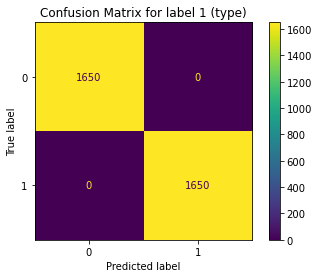

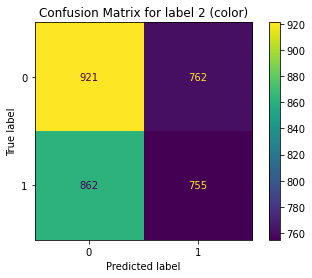

In [31]:
# Create the SVM
svm = LinearSVC(random_state=42)

# Make it an Multilabel classifier
multilabel_classifier = MultiOutputClassifier(svm, n_jobs=-1)

# Fit the data to the Multilabel classifier
multilabel_classifier = multilabel_classifier.fit(X_train, y_train)

# Get predictions for test data
y_test_pred = multilabel_classifier.predict(X_test)

# Generate multiclass confusion matrices
matrices = multilabel_confusion_matrix(y_test, y_test_pred)

# Plotting matrices: code
cmd = ConfusionMatrixDisplay(matrices[0], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 1 (type)')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[1], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 2 (color)')
plt.show()

In [32]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)
# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']
